# Packages, Libraries, and Constants
- Different packages, Libraries

- Different constants and parameters

In [ ]:
from packages.common_packages import * 

# Path to the datasets

1. Speech Intent Classification (SIC) Dataset
 - `emabega` - `ddyo` - `unknown` - `kkono`  - `yimirira` - `mu maaso` 

2. Datasets
- `Augmented train data` - `Original train data` - `Test data`


In [ ]:
from packages.dataset_path import *

In [52]:
def load_data(json_path):
    with open(json_path, "r") as fp:
        data = json.load(fp)
    return data

train_data = load_data('train_mfccs.json')
test_data = load_data('test_mfccs.json')

In [53]:
# Convert lists to numpy arrays
X_train = np.array(train_data["mfcc"])
y_train = np.array(train_data["labels"])
X_test = np.array(test_data["mfcc"])
y_test = np.array(test_data["labels"])

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


In [54]:
def model(input_shape):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(16, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.GlobalMaxPooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(np.unique(y_train)), activation='softmax')
    ])

    return model



In [55]:
# Input shape
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [56]:
input_shape

(13, 13, 1)

In [57]:
model = model(input_shape)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 13, 13, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 6, 6, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 1, 1, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_3          │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,438 (447.02 KB)

 Trainable params: 114,438 (447.02 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:

# Compile model
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=50)


Epoch 1/50


264/264 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.3639 - loss: 1.6632 - val_accuracy: 0.4860 - val_loss: 1.2799
Epoch 2/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.5021 - loss: 1.2642 - val_accuracy: 0.5359 - val_loss: 1.1936
Epoch 3/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.5486 - loss: 1.1506 - val_accuracy: 0.5876 - val_loss: 1.0898
Epoch 4/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.5792 - loss: 1.0808 - val_accuracy: 0.5846 - val_loss: 1.0823
Epoch 5/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.6059 - loss: 1.0208 - val_accuracy: 0.6128 - val_loss: 1.0280
Epoch 6/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6280 - loss: 0.9804 - val_accuracy: 0.6081 - val_loss: 1.0021
Epoch 7/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.6419 - loss: 0.9348 - val_accuracy: 0.6338 - val_loss: 0.9595
Epoch 8/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.6512 - loss: 0.8974 - val_accuracy: 0.64

In [59]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.2f}')

164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5847 - loss: 2.6077
Test Accuracy: 0.57


In [60]:
# Assuming you have the test data prepared as X_test and y_test
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Calculate accuracy, precision, and F1 score
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print classification report
class_report = classification_report(y_test, y_pred_classes)
print("Classification Report:\n", class_report)



164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.50      0.51       983
           1       0.62      0.95      0.75       608
           2       0.56      0.62      0.59       961
           3       0.65      0.51      0.57       942
           4       0.55      0.46      0.50       857
           5       0.53      0.49      0.51       885

    accuracy                           0.57      5236
   macro avg       0.57      0.59      0.57      5236
weighted avg       0.57      0.57      0.56      5236



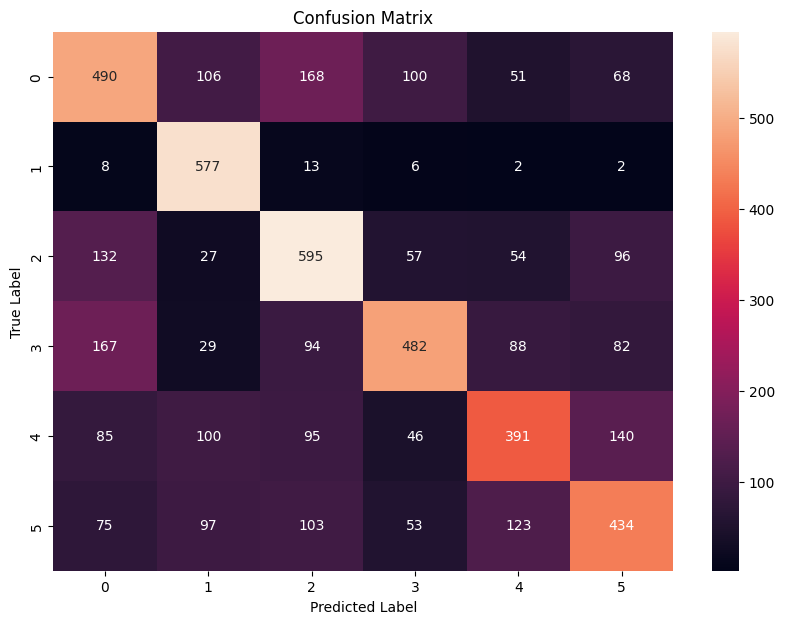

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, classification_report


# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


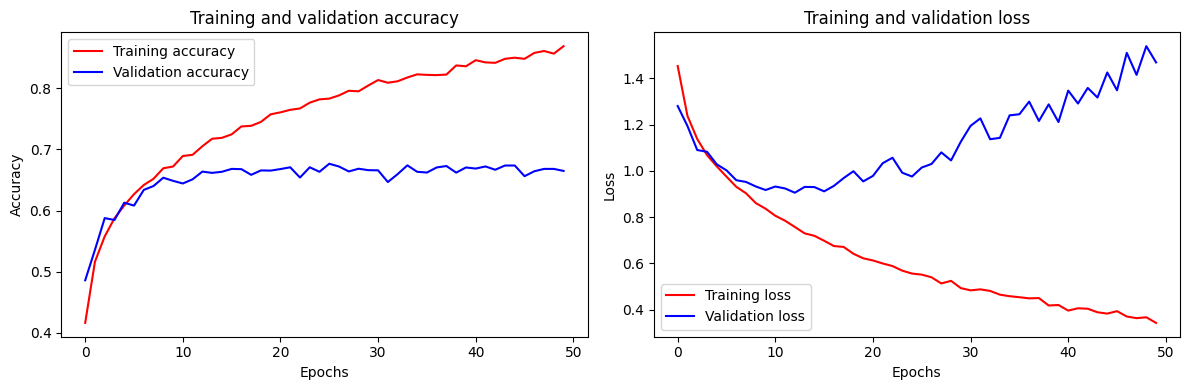

In [62]:

# Function to plot the training history
def plot_training_history(history):
    try:
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs = range(len(acc))

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(epochs, acc, 'r', label='Training accuracy')
        plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(epochs, loss, 'r', label='Training loss')
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred during plotting the training history: {str(e)}")
        
plot_training_history(history)


In [63]:
model.save("audio_classification_model.h5")

In [64]:
def predict(file_path, model):
    # Load the audio file
    signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

    # Extract MFCCs
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13, n_fft=2048, hop_length=512)
    mfcc = mfcc.T

    # Ensure the correct shape
    mfcc = np.expand_dims(mfcc, axis=-1)
    mfcc = np.expand_dims(mfcc, axis=0)

    # Make prediction
    prediction = model.predict(mfcc)
    predicted_index = np.argmax(prediction, axis=1)
    return predicted_index

# Load the model
model = tf.keras.models.load_model('audio_classification_model.h5')



In [65]:
train_data_dir = pathlib.Path('Dataset/Train')

emabega_file_path = os.path.join(train_data_dir, 'emabega', 'emabega_001.wav')
ddyo_file_path = os.path.join(train_data_dir, 'ddyo', 'ddyo_001.wav')

In [66]:
#  Predict
file_path = ddyo_file_path
predicted_class = predict(file_path, model)
print(f'Predicted Class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Predicted Class: [4]


In [67]:
KERAS_MODEL_PATH = "model/mfcc_model_1.keras"
model.save(KERAS_MODEL_PATH)


In [68]:
# Function to get the file size
def get_and_convert_file_size(file_path, unit=None):
    size = os.path.getsize(file_path)
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [69]:
keras_model_size = get_and_convert_file_size(KERAS_MODEL_PATH, 'KB')

File size: 483.714 Kilobytes
